### analyses of historical MJO phase 3 experiments beyond 2017

**Products**: Fig. S2

In [3]:
import os
import io
import sys
import glob
import numpy as np
import xarray as xr
# import gcsfs

import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as patches
import cartopy.crs as ccrs
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import FormatStrFormatter
from PIL import Image

from datetime import datetime, timedelta

# Add utils directory to Python path
utils_path = os.path.abspath("../utils")
sys.path.append(utils_path)

from generate_z500a_pangu import *
from generate_z500a_era5 import *
from generate_z500a_neuralgcm import *
from plot_res import *

#### 1. read ERA5

In [4]:
#===================================#
# load validation data from ERA5
#===================================#
def create_z500a_casemean_era5_2017beyond():
    '''
    generate case-mean for z500 anomalies
    '''
    import os
    import sys
    import glob
    import numpy as np
    import xarray as xr

    print(f'Generating case mean for ERA5 validation')
    #===== load dates =====#
    fname = './historical-MJO-P3_cases_2017beyond.txt'
    dates = []

    # Open the file and read the lines
    with open(fname, 'r') as file:
        for line in file:
            if not line.startswith("#"):
                date = line.strip()
                dates.append(date)

    #===== load experiment outputs =====#
    fpath_exp = f'../data/ERA5/validation_hist-MJO-P3/'
    files = []
    for date in dates:
        f_name = f'era5_z500a_{date}_day0-30.nc'
        files.append(fpath_exp + f_name)

    ds = [xr.open_dataset(f) for f in files]
    ds_aligned = xr.align(*ds, join='override')

    ds_out = xr.concat(ds_aligned, dim="ensemble").mean(dim="ensemble")
    ds_out.attrs.update({
        "description": 'case mean of historical-MJO-P3 from ERA5 validation',
        "number_of_ensemble": len(ds)
    })
    
    fout_name = f'era5_z500a_case-mean.2017beyond.day0-30.nc'
    
    if os.path.exists(fpath_exp + fout_name):
        os.remove(fpath_exp + fout_name)
    ds_out.to_netcdf(fpath_exp + fout_name)

#===== read or create the z500a file =====#
fpath_era = f'../data/ERA5/validation_hist-MJO-P3/'
fname_era = f'era5_z500a_case-mean.2017beyond.day0-30.nc'

if os.path.exists(fpath_era + fname_era):
    print('era5 z500a found, reading it...')
    ds_era = xr.open_dataset(fpath_era + fname_era)
    z500a_era = ds_era['z500a']
    z500_era = ds_era['z500']
else:
    create_z500a_casemean_era5_2017beyond()

era5 z500a found, reading it...


#### 2. read Pangu

In [5]:
#===================================#
# load exp. outputs
#===================================#
def create_z500a_casemean_pangu_2017beyond(case_name = 'Hist-MJO-P3_Pangu'):
    '''
    generate case-mean for z500 anomalies
    '''
    import os
    import sys
    import glob
    import numpy as np
    import xarray as xr

    print(f'Generating case mean: {case_name}')
    #===== load dates =====#
    fname = './historical-MJO-P3_cases_2017beyond.txt'
    dates = []

    # Open the file and read the lines
    with open(fname, 'r') as file:
        for line in file:
            if not line.startswith("#"):
                date = line.strip()
                dates.append(date)

    #===== load experiment outputs =====#
    files = []
    for date in dates:
        fpath_exp = f'../data/exp_Hist-MJO-P3/{case_name}_{date}/'
        f_name = f'output_upper.{case_name}_{date}.z500_anomaly.day0-30.nc'
        files.append(fpath_exp + f_name)

    ds = [xr.open_dataset(f) for f in files]
    ds_aligned = xr.align(*ds, join='override')

    ds_out = xr.concat(ds_aligned, dim="ensemble").mean(dim="ensemble")
    print(ds_out)
    ds_out.attrs.update({
        "description": 'ensemble mean of historical-MJO-P3',
        "number_of_ensemble": len(ds)
    })
    
    fout_path = f'../data/exp_Hist-MJO-P3/'
    fout_name = f'output_upper.{case_name}.z500a.case-mean.2017beyond.day0-30.nc'
    
    if os.path.exists(fout_path + fout_name):
        os.remove(fout_path + fout_name)
    ds_out.to_netcdf(fout_path + fout_name)


#===== read or create the z500 file =====#
fpath_exp = f'../data/exp_Hist-MJO-P3/'
fname = f'output_upper.Hist-MJO-P3_Pangu.z500a.case-mean.2017beyond.day0-30.nc'
if os.path.exists(fpath_exp + fname):
    print('case-mean z500a found, reading it...')
    ds = xr.open_dataset(fpath_exp + fname)
    z500_pg = ds['z500']
    z500a_pg = ds['z500a']
else:
    create_z500a_casemean_pangu_2017beyond()


case-mean z500a found, reading it...


#### 3. read NeuralGCM

In [7]:
#===================================#
# load exp. outputs
#===================================#
def create_z500a_casemean_neuralgcm_2017beyond(case_name = 'Hist-MJO-P3_NeuralGCM'):
    '''
    generate case-mean for z500 anomalies
    '''
    import os
    import sys
    import glob
    import numpy as np
    import xarray as xr

    print(f'Generating case mean: {case_name}')
    
    #===== load dates =====#
    fname = './historical-MJO-P3_cases_2017beyond.txt'
    dates = []

    # Open the file and read the lines
    with open(fname, 'r') as file:
        for line in file:
            if not line.startswith("#"):
                date = line.strip()
                dates.append(date)

    #===== load experiment outputs =====#
    files = []
    for date in dates:
        fpath_exp = f'../exp_historical-MJO-P3/outputs/{case_name}_{date}/'
        f_name = f'output.{case_name}_{date}.z500_anomaly.day0-30.nc'
        files.append(fpath_exp + f_name)

    ds = [xr.open_dataset(f) for f in files]
    ds_aligned = xr.align(*ds, join='override')

    ds_out = xr.concat(ds_aligned, dim="ensemble").mean(dim="ensemble")
    ds_out.attrs.update({
        "description": 'ensemble mean of historical-MJO-P3',
        "number_of_ensemble": len(ds)
    })
    
    fout_path = f'../data/exp_Hist-MJO-P3/'
    fout_name = f'output.{case_name}.z500a.case-mean.2017beyond.day0-30.nc'
    
    if os.path.exists(fout_path + fout_name):
        os.remove(fout_path + fout_name)
    ds_out.to_netcdf(fout_path + fout_name)

#===== read or create the z500 file =====#
fpath_exp = f'../data/exp_Hist-MJO-P3/'
fname = f'output.Hist-MJO-P3_NeuralGCM.z500a.case-mean.2017beyond.day0-30.nc'

if os.path.exists(fpath_exp + fname):
    print('case-mean z500a found, reading it...')
    ds = xr.open_dataset(fpath_exp + fname)
    z500_ne = ds['z500']
    z500a_ne = ds['z500a']
else:
    create_z500a_casemean_neuralgcm_2017beyond()


case-mean z500a found, reading it...


#### 4. Visualization

In [8]:
def plot_z500(fig, ax, z500, title, vlim=0):
        
    ax.set_global()
    ax.coastlines()
    # ax.gridlines(draw_labels=True)

    ax.set_title('')
    ax.set_title(title, loc='center', fontsize=15)

    #=====  set colorbar limits =====#
    if vlim == 0:
        vmax = round(float(z500.sel(latitude=slice(60, -60)).max()) * 1.2)
        vmin = -1*vmax
    else:
        vmax = vlim[1]
        vmin = vlim[0]
    contour_levels = list(np.arange(vmin, vmax*1.01, vmax/20))

    cmap = plt.get_cmap('bwr', 256)
    #===== plot contourf =====#
    contour = ax.contourf(z500.longitude, z500.latitude, z500,  transform=ccrs.PlateCarree(),
                          cmap=cmap, extend='both', levels=contour_levels, vmin=vmin, vmax=vmax)

    #===== add individual colorbar =====#   
    cbar = fig.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, aspect=20, shrink=0.6, label='m')
    cbar.ax.tick_params(labelsize=10)
    cbar.locator = LinearLocator(numticks=5)  # You can change nbins to 4, 6, etc.
    cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))  # or '%.0f' for integers
    cbar.update_ticks()   

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3872388/1711518353.py:17: SyntaxWarning: invalid escape sequence '\m'
  title = f'({panel_num[0][i]}) $\mathbf{{ERA5}}$: Week 1'
/tmp/ipykernel_3872388/1711518353.py:38: SyntaxWarning: invalid escape sequence '\m'
  title = f'({panel_num[2][i]}) $\mathbf{{Pangu}}$: Week 1'


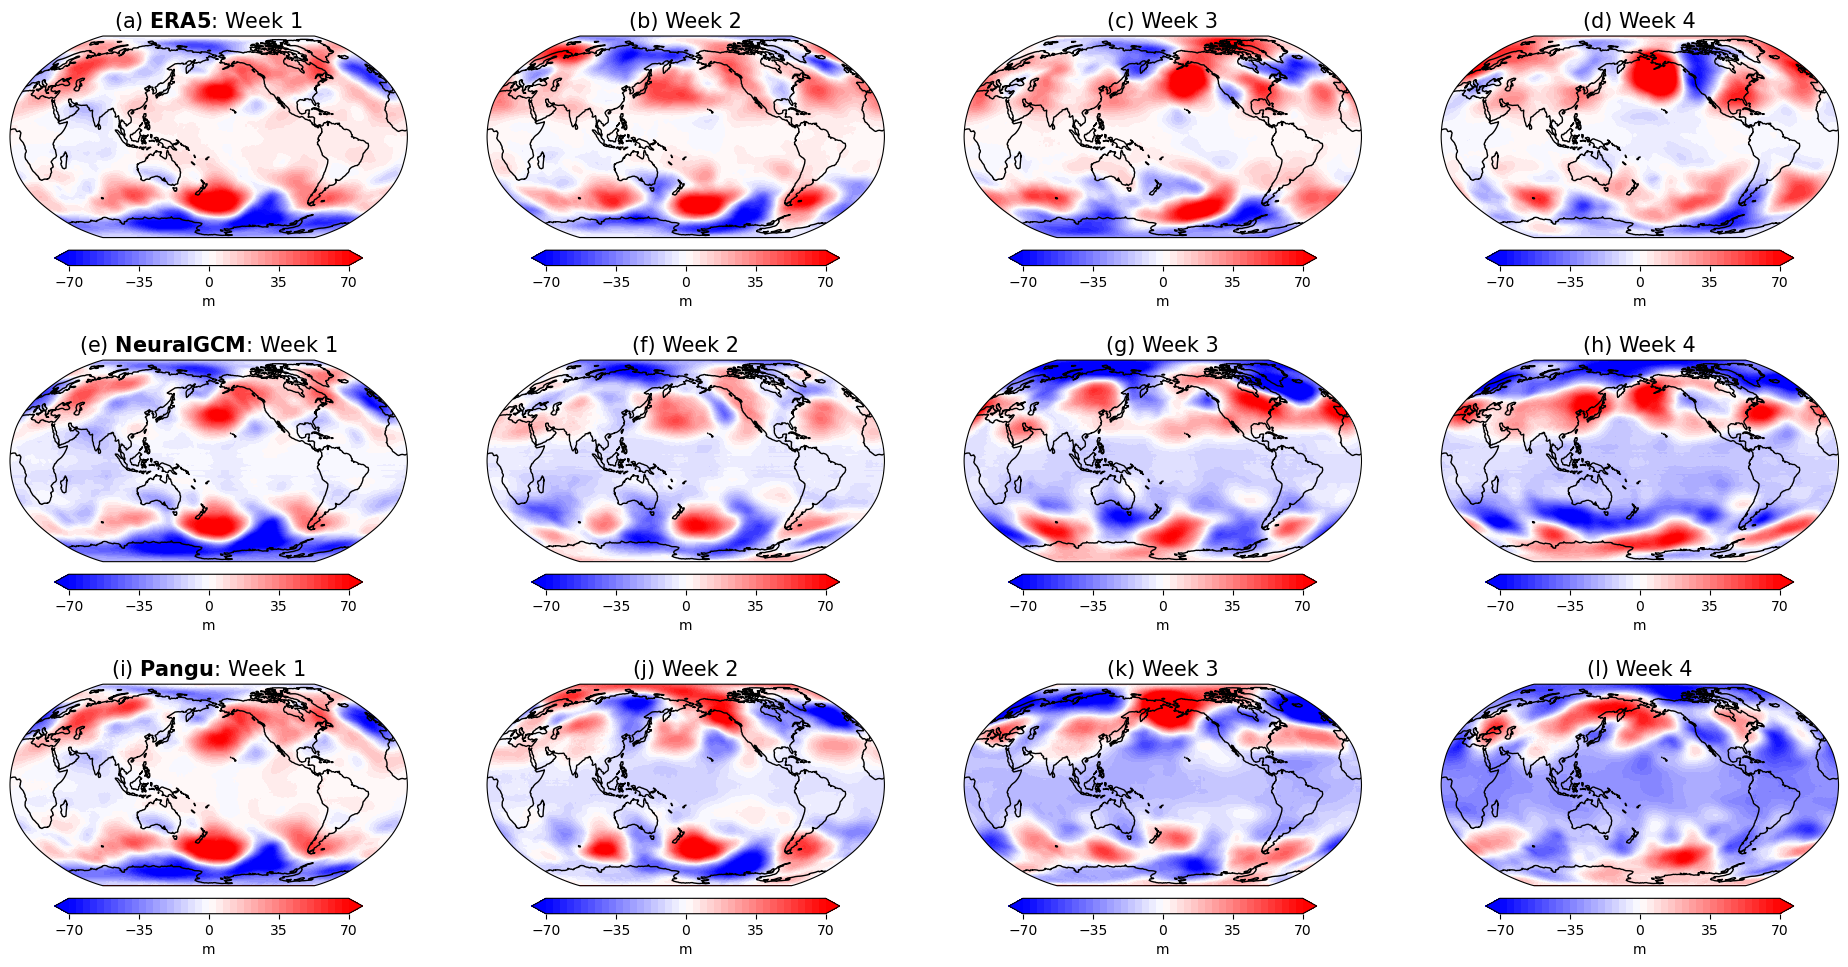

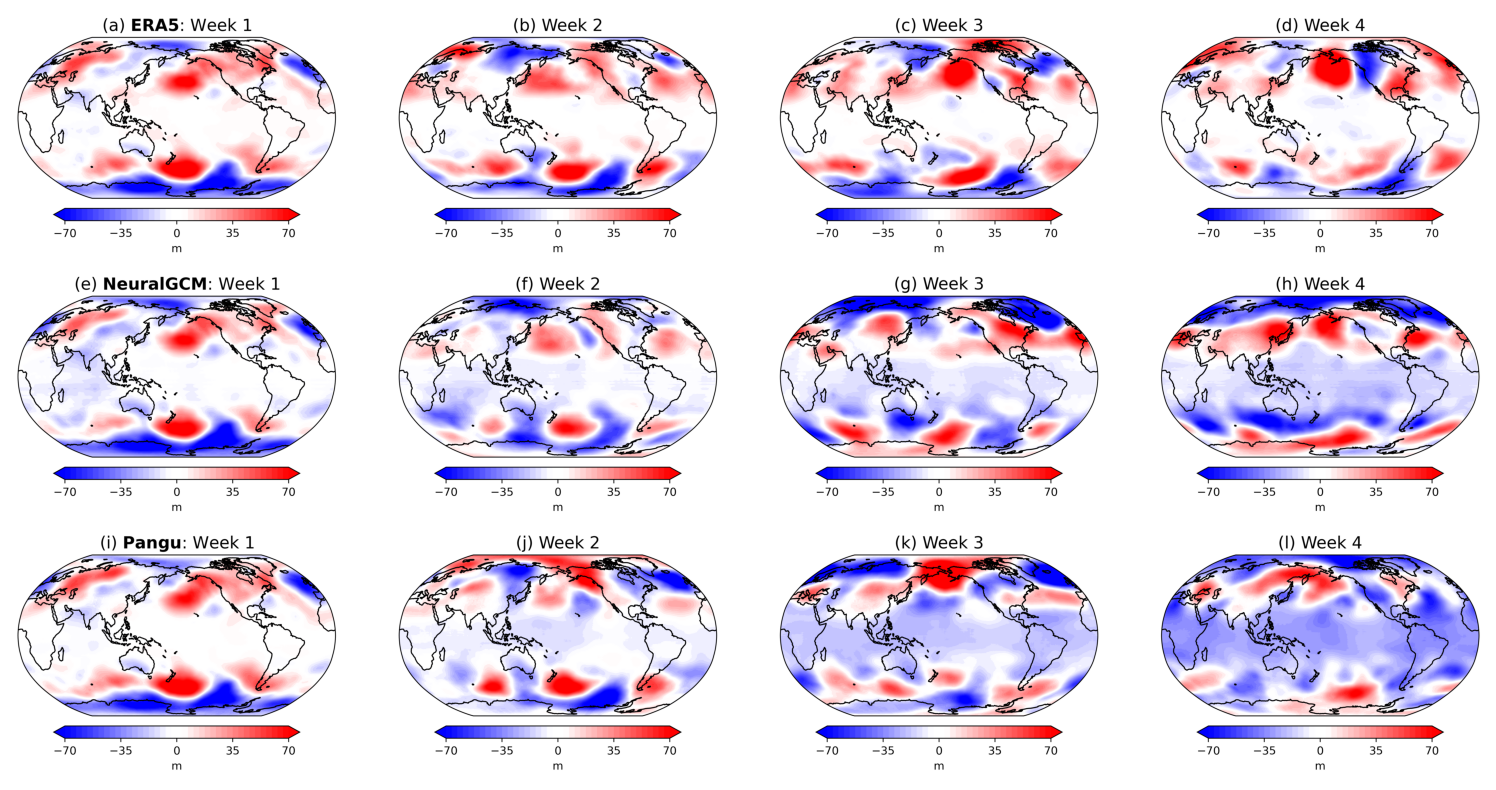

In [36]:
#===================================#
# plot figure1: evolving pattern
#===================================#

proj = ccrs.Robinson(central_longitude=180) 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10), subplot_kw={'projection': proj})

panel_num = [['a', 'b', 'c', 'd'],
             ['e', 'f', 'g', 'h'],
             ['i', 'j', 'k', 'l']]

for i in range(4):
    #===== ERA5 =====#
    z_era = z500a_era.isel(time=slice(i*7+1, (i+1)*7+1)).mean(dim='time')
    
    if i == 0:
        title = f'({panel_num[0][i]}) $\mathbf{{ERA5}}$: Week 1'
    else:
        title = f'({panel_num[0][i]}) Week {i+1}'

    plot_z500(fig, axes[0, i], z_era, title, vlim=[-70, 70])
    
    #===== NeuralGCM =====#
    z_ne = z500a_ne.isel(time=slice(i*7+1, (i+1)*7+1)).mean(dim='time')
    z_ne = z_ne.transpose('latitude', 'longitude')
    
    if i == 0:
        title = rf'({panel_num[1][i]}) $\mathbf{{NeuralGCM}}$: Week 1'
    else:
        title = f'({panel_num[1][i]}) Week {i+1}'

    plot_z500(fig, axes[1, i], z_ne, title, vlim=[-70, 70])

    #===== Pangu =====#
    z_pg = z500a_pg.isel(time=slice(i*7+1, (i+1)*7+1)).mean(dim='time')

    if i == 0:
        title = f'({panel_num[2][i]}) $\mathbf{{Pangu}}$: Week 1'
    else:
        title = f'({panel_num[2][i]}) Week {i+1}'

    plot_z500(fig, axes[2, i], z_pg, title, vlim=[-70, 70])

#==================================================================================================#
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout(pad=2.0)

#===== adjust brightness =====#
buf = io.BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight', dpi=400)
buf.seek(0)
image = Image.open(buf).convert('RGB')
bright_image = Image.eval(image, lambda x: min(int(x * 1.07), 255))  # 1.2 = brighten factor
plt.figure(figsize=(20, 10))
plt.imshow(bright_image)
plt.axis('off')

plt.savefig('../analy/figs/Fig_S2.png', dpi=400)  # Save as PNG with 300 DPI
plt.show()
